In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Look at OneBatch

In [2]:
onebatch = pd.read_csv("../data/OneBatch3_FINAL2.csv")

In [3]:
onebatch.shape

(96, 454)

In [4]:
onebatch.head()

,Unnamed: 0,Sample,SZ,Type,Region,Donor,Order,Mass,MassCoef,AHexCer.60.3.O3.AHexCer..O.18.1.20.2.O2.22.0.O,...,TG.54.6.TG.18.2_18.2_18.2,TG.56.3.TG.18.0_20.1_18.2,TG.56.4.TG.18.0_18.1_20.3,TG.56.5.TG.16.0_18.1_22.4,TG.56.6.TG.18.1_18.2_20.3,TG.56.7.TG.16.0_18.2_22.5,TG.56.8.TG.16.0_18.2_22.6,TG.58.6.TG.18.1_18.1_22.4,TG.60.12.TG.20.4_20.4_20.4,TG.60.2.TG.16.0_18.1_26.1
0,V19,HC10M_f_36_BA22p_x2_NEG_093,HC,Sample,CCp,HC10M,93,24.9,0.371845,18.468832,...,18.377803,16.432781,17.493973,19.151410,20.239438,18.585690,17.545515,16.029527,12.172040,17.309812
1,V20,HC10M_f_36_BA9_x2_NEG_041,HC,Sample,BA9,HC10M,41,16.4,-0.230605,16.391133,...,16.496128,9.904237,14.762389,17.026599,18.412673,18.138457,16.816313,15.818112,13.908578,11.124757
2,V21,HC10M_f_36_CCa_x2_NEG_092,HC,Sample,Cca,HC10M,92,21.1,0.132942,19.856794,...,19.318333,17.133684,17.770724,20.019961,20.705704,19.432690,18.723744,17.014345,15.549721,17.252146
3,V22,HC10M_f_36_CCp_x2_NEG_068,HC,Sample,BA22,HC10M,68,18.6,-0.048999,17.973209,...,18.104819,14.678734,16.615553,18.338063,19.867035,19.946156,18.602401,16.282569,16.892769,12.249155
4,V23,HC16M_f_54_BA22p_x2_NEG_006,HC,Sample,BA22,HC16M,6,14.6,-0.398333,20.322220,...,17.514212,14.660186,17.080504,20.000960,20.228049,20.021595,18.954222,16.106111,16.194108,15.068210


In [5]:
onebatch.isna().sum().sum()

0

In [6]:
onebatch.SZ.value_counts()

HC    48
SZ    48
Name: SZ, dtype: int64

In [7]:
onebatch.Region.value_counts()

CCp     24
BA9     24
Cca     24
BA22    24
Name: Region, dtype: int64

In [8]:
onebatch.Donor.value_counts()

HC10M     4
HC16M     4
SZ8f      4
SZ7m      4
SZ6f      4
SZ5m      4
SZ4f      4
SZ3f      4
SZ13m     4
SZ12m     4
SZ11f     4
SZ10f     4
SZ1m      4
HC9M      4
HC91f     4
HC8M      4
HC79m     4
HC6M      4
HC5M      4
HC318m    4
HC31m     4
HC29f     4
HC24f     4
SZ9m      4
Name: Donor, dtype: int64

In [9]:
onebatch.Donor.nunique()

24

In [9]:
lipid_classes = onebatch.columns[9:].str.split(".").str[0]
print(len(set(lipid_classes)))
print((lipid_classes.value_counts() == 1).sum())
lipid_classes.value_counts()

34
15


PC                  125
PE                   68
TG                   31
FA                   29
Cer                  26
LPC                  20
DG                   20
LPE                  17
SM                   15
PG                   14
NAE                  13
HexCer               13
SHexCer              12
PI                    8
MGDG                  7
ST                    5
CAR                   3
AHexCer               2
CL                    2
StandardNEG_PE        1
ASG                   1
BMP                   1
StandardNEG_LPC2      1
CoQ10                 1
StandardNEG_LPC1      1
StandardNEG_Cer       1
StandardPOS_Cer       1
StandardPOS_DG        1
StandardPOS_LPC1      1
StandardPOS_LPC2      1
StandardPOS_PC        1
StandardPOS_PE        1
StandardPOS_TG        1
StandardNEG_PC        1
dtype: int64

12 здоровых людей, 12 шизофреников, у каждого взяли 4 участка мозга

cingulate cortex posterior, BA9, cingulate cortex anterior, BA22

34 класса липидов, у 15 из них всего 1 молекула, у 19 более 1 молекулы

<Axes: ylabel='Density'>

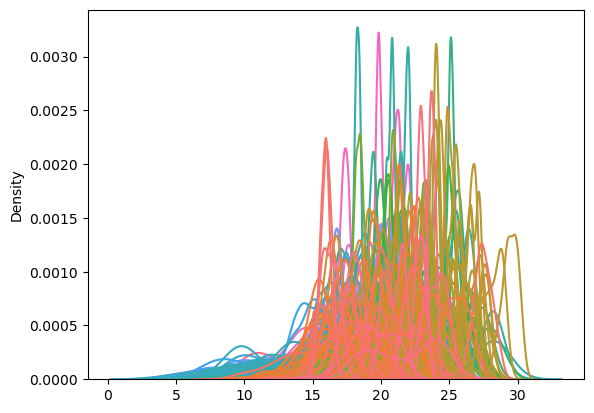

In [10]:
sns.kdeplot(onebatch.iloc[:, 9:], legend=False, common_norm=True)

# Graph Neural Network

In [12]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

/home/zybinmikhail/anaconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

,num,name,x,z,y
0,1,1 Cerebellar Grey Matter,30.0,-30.0,80.00
1,2,2 Anterior Supramarginal (BA40a),45.0,50.0,37.75
2,3,3 Posterior Superior Parietal (BA7p),25.0,45.0,65.20
3,4,4 Anterior Superior Parietal (BA5/BA7a),30.0,55.0,49.00
4,5,5 Retrosplenial (BA29/30),5.0,10.0,49.00


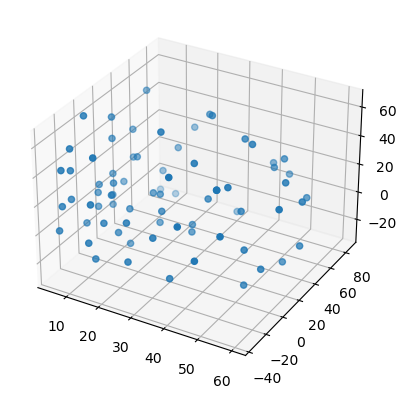

In [14]:
coord = pd.read_csv("../data/75_regions_coord.txt", sep="\t")
display(coord.head())
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(coord.x, coord.y, coord.z)

In [15]:
h_lipids = pd.read_csv("../data/ours_maria_version/rtmz_H_pos_std_weight_norm_TL_COMBINED.csv", index_col=0)
sz_lipids = pd.read_csv("../data/ours_maria_version/rtmz_SZ_pos_std_weight_norm_TL_COMBINED.csv", index_col=0)

h_lipids.index = h_lipids.index.str.split(".").str[0]

meta = pd.read_csv("../data/ours_maria_version/meta_pos_COMBINED.csv")
meta = meta[["Sample", "Brain_abbr", "Region_detailed"]].set_index("Sample")

sz_lipids = meta.join(sz_lipids, how="inner")
sz_lipids["region_id"] = sz_lipids.Region_detailed.str.split(" ").str[0].astype(int)

h_lipids = meta.join(h_lipids, how="inner")
h_lipids["region_id"] = h_lipids.Region_detailed.str.split(" ").str[0].astype(int)

In [16]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(379, 16)
        self.conv2 = GCNConv(16, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [63]:
full_graph = [[[i, j] for i in range(75)] for j in range(75)]

full_graph = np.concatenate(full_graph).T

In [64]:
data_list = []
for human in ["H1", "H2", "H3", "H5"]:
    lipid_profiles = sz_lipids[sz_lipids.Brain_abbr == human].sort_values(by="region_id").iloc[:, 2:-1].values
    lipid_profiles = torch.Tensor(lipid_profiles)
    print(lipid_profiles.shape)
    data = Data(
        x=lipid_profiles,
        edge_index=full_graph,
        pos=coord[["x", "y", "z"]],
        y=1,
    )
    data_list.append(data)

for human in ["HA", "HB", "HC", "HD"]:
    lipid_profiles = h_lipids[h_lipids.Brain_abbr == human].sort_values(by="region_id").iloc[:, 2:-1].values
    lipid_profiles = torch.Tensor(lipid_profiles)
    data = Data(
        x=lipid_profiles,
        edge_index=full_graph,
        pos=coord[["x", "y", "z"]],
        y=0,
    )
    print(lipid_profiles.shape)
    data_list.append(data)

torch.Size([75, 379])
torch.Size([74, 379])
torch.Size([72, 379])
torch.Size([71, 379])
torch.Size([77, 379])
torch.Size([73, 379])
torch.Size([75, 379])
torch.Size([71, 379])


In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [66]:
loader = DataLoader(data_list, batch_size=8, shuffle=True)

In [67]:
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    
    data = next(iter(loader)).to(device)    
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

ValueError: `MessagePassing.propagate` only supports integer tensors of shape `[2, num_messages]`, `torch_sparse.SparseTensor` or `torch.sparse.Tensor` for argument `edge_index`.

# Distribution Estimation

In [39]:
onebatch = pd.read_csv("../data/OneBatch3_FINAL2.csv")
onebatch

,Unnamed: 0,Sample,SZ,Type,Region,Donor,Order,Mass,MassCoef,AHexCer.60.3.O3.AHexCer..O.18.1.20.2.O2.22.0.O,...,TG.54.6.TG.18.2_18.2_18.2,TG.56.3.TG.18.0_20.1_18.2,TG.56.4.TG.18.0_18.1_20.3,TG.56.5.TG.16.0_18.1_22.4,TG.56.6.TG.18.1_18.2_20.3,TG.56.7.TG.16.0_18.2_22.5,TG.56.8.TG.16.0_18.2_22.6,TG.58.6.TG.18.1_18.1_22.4,TG.60.12.TG.20.4_20.4_20.4,TG.60.2.TG.16.0_18.1_26.1
0,V19,HC10M_f_36_BA22p_x2_NEG_093,HC,Sample,CCp,HC10M,93,24.9,0.371845,18.468832,...,18.377803,16.432781,17.493973,19.151410,20.239438,18.585690,17.545515,16.029527,12.172040,17.309812
1,V20,HC10M_f_36_BA9_x2_NEG_041,HC,Sample,BA9,HC10M,41,16.4,-0.230605,16.391133,...,16.496128,9.904237,14.762389,17.026599,18.412673,18.138457,16.816313,15.818112,13.908578,11.124757
2,V21,HC10M_f_36_CCa_x2_NEG_092,HC,Sample,Cca,HC10M,92,21.1,0.132942,19.856794,...,19.318333,17.133684,17.770724,20.019961,20.705704,19.432690,18.723744,17.014345,15.549721,17.252146
3,V22,HC10M_f_36_CCp_x2_NEG_068,HC,Sample,BA22,HC10M,68,18.6,-0.048999,17.973209,...,18.104819,14.678734,16.615553,18.338063,19.867035,19.946156,18.602401,16.282569,16.892769,12.249155
4,V23,HC16M_f_54_BA22p_x2_NEG_006,HC,Sample,BA22,HC16M,6,14.6,-0.398333,20.322220,...,17.514212,14.660186,17.080504,20.000960,20.228049,20.021595,18.954222,16.106111,16.194108,15.068210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,V110,SZ8_f_56_CCp_x2_NEG_013,SZ,Sample,CCp,SZ8f,13,13.8,-0.479633,19.608782,...,17.492426,16.529611,17.613540,19.636678,19.920861,18.982363,17.143618,15.752736,15.316812,15.284984
92,V111,SZ9_m_57_BA22p_x2_NEG_032,SZ,Sample,BA22,SZ9m,32,15.6,-0.302755,18.711650,...,16.824560,13.301147,16.051577,17.728923,18.007713,19.074523,17.664231,15.526488,14.817615,11.267524
93,V112,SZ9_m_57_BA9_x2_NEG_043,SZ,Sample,BA9,SZ9m,43,16.7,-0.204453,17.486790,...,17.692464,9.545546,15.205402,17.455803,17.989163,18.910679,17.996167,14.690182,15.560382,10.766066
94,V113,SZ9_m_57_CCa_x2_NEG_016,SZ,Sample,Cca,SZ9m,16,16.7,-0.204453,21.804088,...,16.702196,17.886143,16.117905,18.218348,19.146838,18.199809,16.596282,16.008041,12.522400,17.741653


In [57]:
meta_lipids = pd.read_csv("../data/ours_maria_version/TL_combined.csv")
FA = meta_lipids[meta_lipids["Lipid.class"] == "FA"]

In [58]:
FA.loc[:, "Lipid.species"] = FA["Lipid.species"].str.replace(":", " ")
onebatch.columns = onebatch.columns.str.replace(".", " ")

/tmp/ipykernel_7199/3807081145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA.loc[:, "Lipid.species"] = FA["Lipid.species"].str.replace(":", " ")
/tmp/ipykernel_7199/3807081145.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  onebatch.columns = onebatch.columns.str.replace(".", " ")


In [61]:
FA_cols = onebatch.columns[onebatch.columns.str.startswith("FA")]
common_FA = list(set(FA_cols) & set(FA["Lipid.species"]))
common_FA

{'FA 16 0',
 'FA 16 1',
 'FA 17 0',
 'FA 18 1',
 'FA 18 2',
 'FA 20 0',
 'FA 20 1',
 'FA 20 3',
 'FA 20 4',
 'FA 20 5',
 'FA 22 0',
 'FA 22 1',
 'FA 22 2',
 'FA 22 3',
 'FA 22 4',
 'FA 22 5',
 'FA 22 6',
 'FA 24 1',
 'FA 24 4',
 'FA 24 5',
 'FA 26 1'}

In [64]:
onebatch_FA = onebatch[onebatch.columns[:8].tolist() + list(common_FA)]

In [89]:
onebatch.Region.nunique()

4

In [105]:
from scipy.stats import normaltest, shapiro, anderson

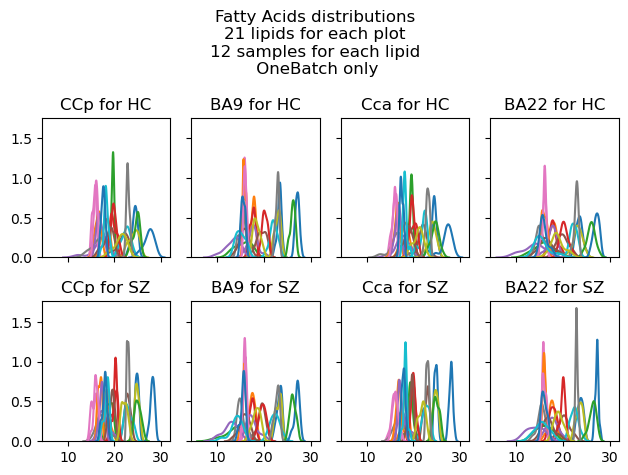

In [163]:
fig, axs = plt.subplots(ncols=4, nrows=2, sharey=True, sharex=True)
axs = axs.flatten()
i = 0
pvalues = []
non_normal = []
for human_type in ["HC", "SZ"]:
    for region_nm in onebatch.Region.unique():
        to_plot = onebatch_FA[(onebatch_FA.SZ == human_type) & (onebatch_FA.Region == region_nm)]

        for acid in common_FA:
            sns.kdeplot(to_plot[acid], label=acid, ax=axs[i])
            curr_pvalue = shapiro(to_plot[acid]).pvalue
            pvalues.append(curr_pvalue)
            if curr_pvalue < .05:
                non_normal.append([acid, human_type, region_nm, curr_pvalue])
        axs[i].set_xlabel("")
        axs[i].set_ylabel("")
        axs[i].set_title(f"{region_nm} for {human_type}")
        i += 1
fig.suptitle("Fatty Acids distributions\n21 lipids for each plot\n12 samples for each lipid\n OneBatch only")
plt.tight_layout()

In [164]:
pvalues = np.array(pvalues)

<Axes: ylabel='Count'>

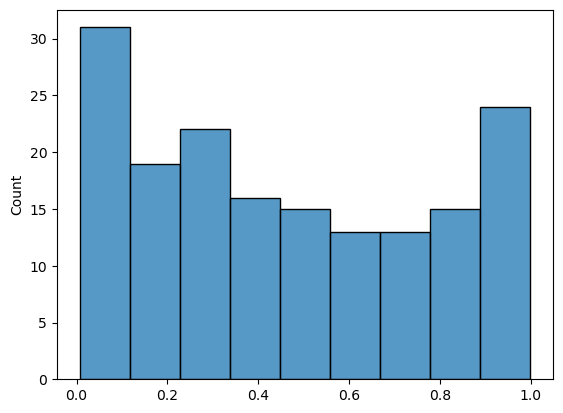

In [165]:
sns.histplot(pvalues)

In [169]:
pd.DataFrame(non_normal, columns=["Lipid", "SZ", "Region", "p-value"])

,Lipid,SZ,Region,p-value
0,FA 26 1,HC,CCp,0.010311
1,FA 20 5,HC,CCp,0.008164
2,FA 22 3,HC,CCp,0.037331
3,FA 22 0,HC,BA9,0.037611
4,FA 17 0,HC,BA9,0.032300
5,FA 22 5,HC,Cca,0.006369
6,FA 22 5,HC,BA22,0.017377
7,FA 20 0,HC,BA22,0.038402
8,FA 24 1,HC,BA22,0.018830
9,FA 22 0,SZ,CCp,0.041302


In [180]:
for brain in h_lipids.Brain_abbr.unique():
    print(h_lipids[h_lipids.Brain_abbr == brain].iloc[:, 2:].values.mean())
for brain in sz_lipids.Brain_abbr.unique():
    print(sz_lipids[sz_lipids.Brain_abbr == brain].iloc[:, 2:].values.mean())
for brain in onebatch.Donor.unique():
    print(onebatch[onebatch.Donor == brain].iloc[:, 9:].values.mean())

0.10000000000000002
0.10237573099415156
0.09759080800593022
0.1011823035850493
0.09999999999999995
0.09896870554765276
0.09886695906432746
0.09877687175685675
19.78164940459665
20.23437963804146
20.04255786102871
20.192677446013857
20.20988891270724
20.287979768404615
19.712367307109492
20.182083103564487
20.25004143139203
20.010924185365838
19.777514219589804
20.041390958190128
19.809919490304935
19.717765055942007
20.13685622217591
20.11783653809689
20.399019324065662
20.353763230115717
19.593980225734576
19.704311022456935
19.81475797162227
20.061173079895745
20.031044435070026
19.9827037855847


In [179]:
h_lipids = h_lipids.groupby(["Brain_abbr", "Region_detailed"]).mean().reset_index()
sz_lipids = sz_lipids.groupby(["Brain_abbr", "Region_detailed"]).mean().reset_index()

In [ ]:
for brain in h_lipids.Brain_abbr.unique():
    print(h_lipids[h_lipids.Brain_abbr == brain].iloc[:, 2:].values.sum())
for brain in sz_lipids.Brain_abbr.unique():
    print(sz_lipids[sz_lipids.Brain_abbr == brain].iloc[:, 2:].values.sum())
for brain in onebatch.Donor.unique():
    print(onebatch[onebatch.Donor == brain].iloc[:, 9:].values.sum())